<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/perceptron_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapt the Perceptron code for the Iris data available in the Overview notebook to output the confusion matrix, using 20% of the data set for validation. Compute also the classification accuracy, precision, recall and F1-score for the solution.

Each student should create a video (3' maximum) and submit the video and the link to the GitHub repository and the file where the modified script is available.

Submission deadline: Thursday, March 28.

MovieWriter imagemagick unavailable; using Pillow instead.


Confusion Matrix:
[[8 0]
 [7 5]]
Accuracy: 0.65
Precision: 1.0
Recall: 0.4166666666666667
F1-score: 0.5882352941176471


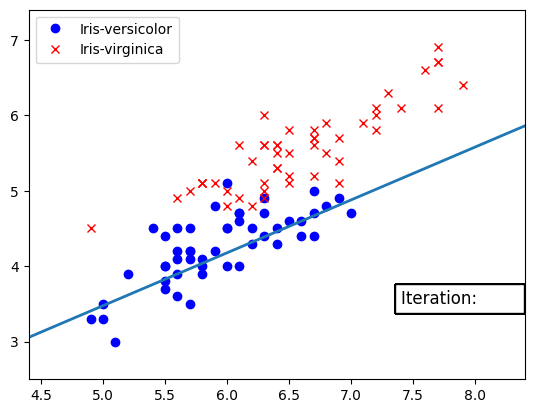

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

class Perceptron():
    #initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, eta=0.1, n_iter=50, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        #iterate over labelled dataset updating weights for each features accordingly (stochastic gradient descent)
        for xi, label in zip(X, y):
            update = self.eta * (label-self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
        return self

    #compute the net input i.e scalar sum of X and the weights plus the bias value
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #predict a classification for a sample of features X
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([],[])
        return self.line,

    def animate(self, iteration_number, X, y):
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        if iteration_number%2==0:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, f'Iteration: {iteration_number}', fontsize=12)  # Update iteration number
        else:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, 'Iteration:'+' '*8, fontsize=12, bbox=dict(facecolor='white', alpha=1))
        return self.line,

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0]/self.w_[2])/(self.w_[0]/self.w_[1])
        intercept = -self.w_[0]/self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            #y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope*i) + intercept)
        return x, y

    def animated_fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights

        #here figure must be defined as a variable so it can be passed to FuncAnimation
        self.fig = plt.figure()

        #setting x and y limits with a 0.5 offset
        self.ax = plt.axes(xlim=(min(X[:,0])-0.5, max(X[:,0])+0.5), ylim=(min(X[:,1])-0.5, max(X[:,1])+0.5))

        #plotting our training points
        self.ax.plot(X[0:50, 0],X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0],X[50:100, 1], "rx", label=self.nameB)

        #labelling
        self.ax.legend(loc='upper left')

        #initialization of separation line and our animation object
        self.line, = self.ax.plot([], [], lw=2)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter, interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')

        # Splitting the dataset into training and validation sets
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

        # Training the perceptron on the training set (adjusts model's parameters to minimize the error between predicted and actual output)
        self.step_fit(X_train, y_train)

        # Predicting on the validation set (predicted labels can be compared with actual labels to evaluate perfomance)
        y_pred = self.predict(X_valid)

        # Generating the confusion matrix
        conf_matrix = confusion_matrix(y_valid, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

        # Computing classification metrics
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred)
        recall = recall_score(y_valid, y_pred)
        f1 = f1_score(y_valid, y_pred)

        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)

#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1= {'name':"Iris-setosa",'s':0,'end':50} #0:50 # small size
SPECIES_2= {'name':"Iris-versicolor",'s':50,'end':100} # 50:100
SPECIES_3= {'name':"Iris-virginica",'s':100,'end':150} # 100:150
spA,spB=SPECIES_2,SPECIES_3

#preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
#y = np.where(y == 'Iris-setosa', -1, 1)
y = np.where(y == spB['name'], -1, 1)

ppn = Perceptron(eta=0.01, n_iter=150, nameA=spA['name'], nameB=spB['name']) #initializing a new perceptron
ppn.animated_fit(X, y)